In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
nyc_cd = gpd.read_file('../data/Community_Districts.geojson')
print(nyc_cd.crs)
nyc_cd.head()

epsg:4326


,boro_cd,shape_area,shape_leng,geometry
0,206,42664311.5086,35875.7117328,"MULTIPOLYGON (((-73.87185 40.84376, -73.87192 ..."
1,404,65739661.969,37018.3738392,"MULTIPOLYGON (((-73.84751 40.73901, -73.84801 ..."
2,304,56662613.1611,37007.806599,"MULTIPOLYGON (((-73.89647 40.68234, -73.89653 ..."
3,205,38316975.1292,29443.0481287,"MULTIPOLYGON (((-73.89138 40.86170, -73.89142 ..."
4,207,53311689.1,44812.1474256,"MULTIPOLYGON (((-73.87519 40.87158, -73.87619 ..."


In [3]:
type(nyc_cd)

geopandas.geodataframe.GeoDataFrame

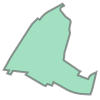

In [4]:
nyc_cd.loc[0, 'geometry']

In [5]:
print(nyc_cd.loc[0, 'geometry'])

MULTIPOLYGON (((-73.8718461029101 40.84376077785583, -73.87191691517283 40.84345374264658, -73.87196432156817 40.84323825377388, -73.87213357846727 40.842497794549, -73.87231748546176 40.84169028202043, -73.87234056327031 40.8415836261895, -73.87236365249346 40.84147696098339, -73.87239558060885 40.84133637543188, -73.872527839146 40.84075398300686, -73.87267805874693 40.84013719710676, -73.87277204658531 40.83975128233606, -73.87298042939128 40.83895248518574, -73.87312728158687 40.83833509641596, -73.87314714674842 40.83826389897314, -73.87317603928548 40.83816583089295, -73.87332746697363 40.83765194933224, -73.87334834302327 40.83759200855819, -73.8735176630578 40.83711442819023, -73.87359053263883 40.83689652518782, -73.87361760595988 40.83681877899325, -73.8737582282926 40.83639819478505, -73.87377308806087 40.83635875143833, -73.87383696556059 40.83636111808446, -73.87389295864384 40.83636341241558, -73.87425833254026 40.83637900224392, -73.87507837210686 40.83642309897043, -73.

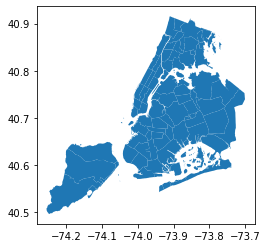

In [6]:
nyc_cd.plot();

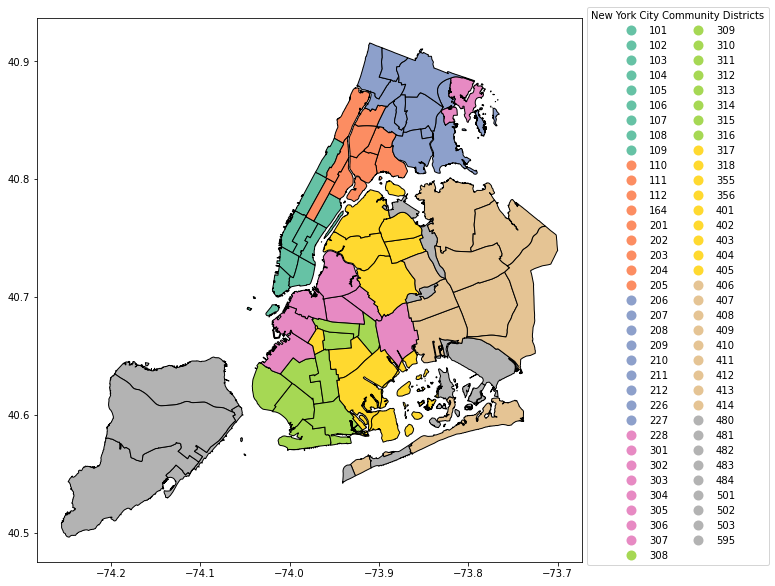

In [7]:
leg_kwds = {'title': 'New York City Community Districts', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

nyc_cd.plot(column = 'boro_cd', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

First let's add the Farmers Market data

In [8]:
farmers_market = pd.read_csv('../data/DOHMH_Farmers_Markets.csv')
print(farmers_market.shape)
farmers_market.head(3)

(138, 15)


,Borough,Market_Name,Street_Address,Community_District_Full_Name,Community_District,Latitude,Longitude,Days_of_Operation,Hours_of_Operations,Season_Dates,Accepts_EBT,Open_Year_Round,Stellar_Cooking_Demonstrations,Food_Activities_for_Kids,Location_Point
0,Brooklyn,Teens for Food Justice Fresh Food Box & Farmst...,85 Watkins Street,Brooklyn Community District 6,306,40.670986,-73.908194,Tuesday,4-6pm,Year-round,No,Yes,No,No,"(40.670986, -73.908194)"
1,Manhattan,Morningside Park's Down to Earth Farmers' Market,W 110th St & Manhattan Ave,Manhattan Community District 7,107,40.801155,-73.959647,Saturday,9am-4pm (winter closes at 3pm),Year-Round,Yes,Yes,No,No,"(40.801155, -73.959647)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,Bronx Community District 4,204,40.839882,-73.916783,Wednesday,2:30pm-6:30pm,8/12/20-11/25/20,Yes,No,No,No,"(40.839882, -73.916783)"


In [9]:
farmers_market = farmers_market[['Borough','Market_Name','Street_Address','Community_District','Latitude','Longitude','Location_Point']]

In [10]:
farmers_market.head()

,Borough,Market_Name,Street_Address,Community_District,Latitude,Longitude,Location_Point
0,Brooklyn,Teens for Food Justice Fresh Food Box & Farmst...,85 Watkins Street,306,40.670986,-73.908194,"(40.670986, -73.908194)"
1,Manhattan,Morningside Park's Down to Earth Farmers' Market,W 110th St & Manhattan Ave,107,40.801155,-73.959647,"(40.801155, -73.959647)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,204,40.839882,-73.916783,"(40.839882, -73.916783)"
3,Manhattan,Fulton Stall Market,Pier 17 Square,101,40.705799,-74.002572,"(40.705799, -74.002572)"
4,Queens,Corona Greenmarket,Roosevelt Ave & 103rd St,404,40.749811,-73.861668,"(40.749811, -73.861668)"


In [11]:
farmers_market.columns = ['Borough','Market_Name','Street_Address','Community_District_FM','Latitude','Longitude','Location_Point']

In [12]:
farmers_market.head()

,Borough,Market_Name,Street_Address,Community_District_FM,Latitude,Longitude,Location_Point
0,Brooklyn,Teens for Food Justice Fresh Food Box & Farmst...,85 Watkins Street,306,40.670986,-73.908194,"(40.670986, -73.908194)"
1,Manhattan,Morningside Park's Down to Earth Farmers' Market,W 110th St & Manhattan Ave,107,40.801155,-73.959647,"(40.801155, -73.959647)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,204,40.839882,-73.916783,"(40.839882, -73.916783)"
3,Manhattan,Fulton Stall Market,Pier 17 Square,101,40.705799,-74.002572,"(40.705799, -74.002572)"
4,Queens,Corona Greenmarket,Roosevelt Ave & 103rd St,404,40.749811,-73.861668,"(40.749811, -73.861668)"


In [13]:
farmers_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Borough                138 non-null    object 
 1   Market_Name            138 non-null    object 
 2   Street_Address         138 non-null    object 
 3   Community_District_FM  138 non-null    int64  
 4   Latitude               138 non-null    float64
 5   Longitude              138 non-null    float64
 6   Location_Point         138 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 7.7+ KB


In [14]:
farmers_market['geometry'] = farmers_market.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
farmers_market.head(3)

,Borough,Market_Name,Street_Address,Community_District_FM,Latitude,Longitude,Location_Point,geometry
0,Brooklyn,Teens for Food Justice Fresh Food Box & Farmst...,85 Watkins Street,306,40.670986,-73.908194,"(40.670986, -73.908194)",POINT (-73.90819399999999 40.670986)
1,Manhattan,Morningside Park's Down to Earth Farmers' Market,W 110th St & Manhattan Ave,107,40.801155,-73.959647,"(40.801155, -73.959647)",POINT (-73.959647 40.801155)
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,204,40.839882,-73.916783,"(40.839882, -73.916783)",POINT (-73.916783 40.839882)


In [15]:
fm_geo = gpd.GeoDataFrame(farmers_market, 
                           crs = nyc_cd.crs, 
                           geometry = farmers_market['geometry'])

In [16]:
type(fm_geo)

geopandas.geodataframe.GeoDataFrame

In [17]:
nyc_cd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Now let's add the healthy stores data

In [18]:
healthy_stores = pd.read_csv('../data/Recognized_Shop_Healthy_Stores.csv')
print(healthy_stores.shape)
healthy_stores.head(3)

(368, 17)


,Store_Name,Street,Address,Street_Address,Borough,Zip,Year_Awarded,Program_Wave,Latitude,Longitude,Community_District_Full_Name,Community_District,Council_District,Census_Tract,BIN,BBL,NTA
0,SIRAH 1720 LLC,535 MARCY AVE,NaN,535 MARCY AVE,Brooklyn,11206,2020,8,40.696961,-73.949512,Brooklyn Community District 3,303,36.0,257.0,3338591.0,3.017390e+09,Bedford
1,FIRST STOP GROCERY INC,643 MARCY AVE,NaN,643 MARCY AVE,Brooklyn,11206,2020,8,40.692552,-73.948632,Brooklyn Community District 3,303,36.0,261.0,3049316.0,3.017710e+09,Bedford
2,AANDE DIRECT LLC,40 LEWIS AVE,NaN,40 LEWIS AVE,Brooklyn,11206,2020,8,40.696576,-73.937777,Brooklyn Community District 3,303,36.0,283.0,3042883.0,3.015850e+09,Stuyvesant Heights


In [19]:
healthy_stores = healthy_stores[['Store_Name','Street_Address','Borough','Latitude','Longitude','Community_District']]

In [20]:
healthy_stores.head()

,Store_Name,Street_Address,Borough,Latitude,Longitude,Community_District
0,SIRAH 1720 LLC,535 MARCY AVE,Brooklyn,40.696961,-73.949512,303
1,FIRST STOP GROCERY INC,643 MARCY AVE,Brooklyn,40.692552,-73.948632,303
2,AANDE DIRECT LLC,40 LEWIS AVE,Brooklyn,40.696576,-73.937777,303
3,CENTRAL ORGANIC,67 CENTRAL AVE,Brooklyn,40.701096,-73.930445,304
4,194 THROOP FOOD CORP,777 PARK AVE,Brooklyn,40.698191,-73.944311,303


In [21]:
healthy_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Store_Name          368 non-null    object 
 1   Street_Address      368 non-null    object 
 2   Borough             368 non-null    object 
 3   Latitude            368 non-null    float64
 4   Longitude           368 non-null    float64
 5   Community_District  368 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 17.4+ KB


In [22]:
healthy_stores['geometry'] = healthy_stores.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
healthy_stores.head(3)

,Store_Name,Street_Address,Borough,Latitude,Longitude,Community_District,geometry
0,SIRAH 1720 LLC,535 MARCY AVE,Brooklyn,40.696961,-73.949512,303,POINT (-73.949512 40.696961)
1,FIRST STOP GROCERY INC,643 MARCY AVE,Brooklyn,40.692552,-73.948632,303,POINT (-73.948632 40.692552)
2,AANDE DIRECT LLC,40 LEWIS AVE,Brooklyn,40.696576,-73.937777,303,POINT (-73.937777 40.696576)


In [23]:
hs_geo = gpd.GeoDataFrame(healthy_stores, 
                           crs = nyc_cd.crs, 
                           geometry = healthy_stores['geometry'])

In [24]:
type(hs_geo)

geopandas.geodataframe.GeoDataFrame

Finally let's add the SNAP Centers

In [25]:
snap = pd.read_csv('../data/Directory_of_SNAP_Centers.csv')
print(snap.shape)
snap.head(3)

(15, 17)


,Borough,Facility_Name,Street_Address,City,Zip,State,Phone_Number(s),Comments,Latitude,Longitude,Community_District_Full_Name,Community_District,Council_District,Census_Tract,BIN,BBL,NTA
0,Bronx,Concourse,"1375 Jerome Avenue, 2nd Fl.",Bronx,10452,NY,929-252-8998,NaN,40.839771,-73.918359,Bronx Community District 4,204,16,219,2008289,2028560020,Highbridge
1,Bronx,Crotona,"1910 Monterey Avenue, 5th Fl.",Bronx,10457,NY,929-252-7436,This center includes a children's area that do...,40.846932,-73.895099,Bronx Community District 6,206,15,37504,2011826,2030600032,East Tremont
2,Bronx,Hunts Point,"845 Barretto Street, B-Level Fl.",Bronx,10474,NY,929-252-4445,NaN,40.817656,-73.890358,Bronx Community District 2,202,17,93,2005939,2027390015,Hunts Point


In [26]:
snap['geometry'] = snap.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
snap.head(3)

,Borough,Facility_Name,Street_Address,City,Zip,State,Phone_Number(s),Comments,Latitude,Longitude,Community_District_Full_Name,Community_District,Council_District,Census_Tract,BIN,BBL,NTA,geometry
0,Bronx,Concourse,"1375 Jerome Avenue, 2nd Fl.",Bronx,10452,NY,929-252-8998,NaN,40.839771,-73.918359,Bronx Community District 4,204,16,219,2008289,2028560020,Highbridge,POINT (-73.918359 40.839771)
1,Bronx,Crotona,"1910 Monterey Avenue, 5th Fl.",Bronx,10457,NY,929-252-7436,This center includes a children's area that do...,40.846932,-73.895099,Bronx Community District 6,206,15,37504,2011826,2030600032,East Tremont,POINT (-73.895099 40.846932)
2,Bronx,Hunts Point,"845 Barretto Street, B-Level Fl.",Bronx,10474,NY,929-252-4445,NaN,40.817656,-73.890358,Bronx Community District 2,202,17,93,2005939,2027390015,Hunts Point,POINT (-73.89035800000001 40.817656)


In [27]:
nyc_cd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [28]:
snap_geo = gpd.GeoDataFrame(snap, 
                           crs = nyc_cd.crs, 
                           geometry = snap['geometry'])

Do we want to rename the Community District Column? Let's think about this before we do a merge or geospatial join.

Let's also drop the unecessary columns now that we fixed the issuse from before.

In [29]:
type(snap_geo)

geopandas.geodataframe.GeoDataFrame

In [30]:
snap.head()

,Borough,Facility_Name,Street_Address,City,Zip,State,Phone_Number(s),Comments,Latitude,Longitude,Community_District_Full_Name,Community_District,Council_District,Census_Tract,BIN,BBL,NTA,geometry
0,Bronx,Concourse,"1375 Jerome Avenue, 2nd Fl.",Bronx,10452,NY,929-252-8998,NaN,40.839771,-73.918359,Bronx Community District 4,204,16,219,2008289,2028560020,Highbridge,POINT (-73.91836 40.83977)
1,Bronx,Crotona,"1910 Monterey Avenue, 5th Fl.",Bronx,10457,NY,929-252-7436,This center includes a children's area that do...,40.846932,-73.895099,Bronx Community District 6,206,15,37504,2011826,2030600032,East Tremont,POINT (-73.89510 40.84693)
2,Bronx,Hunts Point,"845 Barretto Street, B-Level Fl.",Bronx,10474,NY,929-252-4445,NaN,40.817656,-73.890358,Bronx Community District 2,202,17,93,2005939,2027390015,Hunts Point,POINT (-73.89036 40.81766)
3,Brooklyn,Clinton Hill,495 Clermont Ave,Brooklyn,11238,NY,929-221-2809 | 929-221-1568,"This center includes a Children's Corner, whic...",40.682851,-73.968809,Brooklyn Community District 2,302,35,199,3335094,3020090001,Clinton Hill,POINT (-73.96881 40.68285)
4,Brooklyn,Coney Island,3050 West 21st Street,Brooklyn,11224,NY,929-221-3856 | 929-221-3867,This center includes a children's area that do...,40.573530,-73.987448,Brooklyn Community District 13,313,47,352,3189654,3070710123,Seagate-Coney Island,POINT (-73.98745 40.57353)


In [31]:
snap = snap[['Borough','Facility_Name','Street_Address','Latitude','Longitude','Community_District','geometry']]

In [32]:
snap.head()

,Borough,Facility_Name,Street_Address,Latitude,Longitude,Community_District,geometry
0,Bronx,Concourse,"1375 Jerome Avenue, 2nd Fl.",40.839771,-73.918359,204,POINT (-73.91836 40.83977)
1,Bronx,Crotona,"1910 Monterey Avenue, 5th Fl.",40.846932,-73.895099,206,POINT (-73.89510 40.84693)
2,Bronx,Hunts Point,"845 Barretto Street, B-Level Fl.",40.817656,-73.890358,202,POINT (-73.89036 40.81766)
3,Brooklyn,Clinton Hill,495 Clermont Ave,40.682851,-73.968809,302,POINT (-73.96881 40.68285)
4,Brooklyn,Coney Island,3050 West 21st Street,40.573530,-73.987448,313,POINT (-73.98745 40.57353)


In [45]:
snap.tail()

,Borough,Facility_Name,Street_Address,Latitude,Longitude,Community_District_SP,geometry
10,Manhattan,Waverly,"12 West 14th St, 4th Fl.",40.736301,-73.994342,102,POINT (-73.99434 40.73630)
11,Queens,Jamaica,"165-08 88th Avenue, 3rd Fl.",40.708661,-73.796703,412,POINT (-73.79670 40.70866)
12,Queens,Queens,"32-20 Northern Blvd., 2nd Fl.",40.751970,-73.931799,401,POINT (-73.93180 40.75197)
13,Queens,Rockaway,"219 Beach 59th Street, 1st Fl.",40.592902,-73.789051,414,POINT (-73.78905 40.59290)
14,Staten Island,Richmond,"201 Bay Street, 2nd Fl.",40.636992,-74.076212,501,POINT (-74.07621 40.63699)


In [33]:
snap.columns = ['Borough','Facility_Name','Street_Address','Latitude','Longitude','Community_District_SP','geometry']

In [34]:
snap.head()

,Borough,Facility_Name,Street_Address,Latitude,Longitude,Community_District_SP,geometry
0,Bronx,Concourse,"1375 Jerome Avenue, 2nd Fl.",40.839771,-73.918359,204,POINT (-73.91836 40.83977)
1,Bronx,Crotona,"1910 Monterey Avenue, 5th Fl.",40.846932,-73.895099,206,POINT (-73.89510 40.84693)
2,Bronx,Hunts Point,"845 Barretto Street, B-Level Fl.",40.817656,-73.890358,202,POINT (-73.89036 40.81766)
3,Brooklyn,Clinton Hill,495 Clermont Ave,40.682851,-73.968809,302,POINT (-73.96881 40.68285)
4,Brooklyn,Coney Island,3050 West 21st Street,40.573530,-73.987448,313,POINT (-73.98745 40.57353)


In [35]:
nyc_cd = nyc_cd[['boro_cd', 'geometry']]

In [36]:
nyc_area_center = ['40.71','-74.00']
print(nyc_area_center)  

['40.71', '-74.00']


In [37]:
map_nyc = folium.Map(location = nyc_area_center, zoom_start = 12)
map_nyc

We will need iterrows for the farmers markets, healthy stores, and snapcenters

In [38]:
i = 0
for row_index, row_values in farmers_market.iterrows():
    if i <3: 
       print('index is', row_index)
       print('values are:')
       print(' ')
       print(row_values)
       print('------------------------- ')
       i+=1

index is 0
values are:
 
Borough                                                           Brooklyn
Market_Name              Teens for Food Justice Fresh Food Box & Farmst...
Street_Address                                           85 Watkins Street
Community_District_FM                                                  306
Latitude                                                         40.670986
Longitude                                                       -73.908194
Location_Point                                     (40.670986, -73.908194)
geometry                              POINT (-73.90819399999999 40.670986)
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
Borough                                                         Manhattan
Market_Name              Morningside Park's Down to Earth Farmers' Market
Street_Address                                 W 110th St & Manhattan Ave
Community_District_FM                                                 107
Lati

In [39]:
i = 0
for row_index, row_values in healthy_stores.iterrows():
    if i <3: 
       print('index is', row_index)
       print('values are:')
       print(' ')
       print(row_values)
       print('------------------------- ')
       i+=1

index is 0
values are:
 
Store_Name                          SIRAH 1720 LLC
Street_Address                      535 MARCY AVE 
Borough                                   Brooklyn
Latitude                                 40.696961
Longitude                               -73.949512
Community_District                             303
geometry              POINT (-73.949512 40.696961)
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
Store_Name                  FIRST STOP GROCERY INC
Street_Address                      643 MARCY AVE 
Borough                                   Brooklyn
Latitude                                 40.692552
Longitude                               -73.948632
Community_District                             303
geometry              POINT (-73.948632 40.692552)
Name: 1, dtype: object
------------------------- 
index is 2
values are:
 
Store_Name                        AANDE DIRECT LLC
Street_Address                       40 LEWIS AVE 
Borough  

In [40]:
i = 0
for row_index, row_values in snap.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
Borough                                         Bronx
Facility_Name                               Concourse
Street_Address            1375 Jerome Avenue, 2nd Fl.
Latitude                                    40.839771
Longitude                                  -73.918359
Community_District_SP                             204
geometry                 POINT (-73.918359 40.839771)
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
Borough                                          Bronx
Facility_Name                                  Crotona
Street_Address           1910 Monterey Avenue, 5th Fl.
Latitude                                     40.846932
Longitude                                   -73.895099
Community_District_SP                              206
geometry                  POINT (-73.895099 40.846932)
Name: 1, dtype: object
------------------------- 
index is 2
values are:
 
Borough                                                 Bronx


In [48]:
map_nyc = folium.Map(location =  nyc_area_center, zoom_start = 12)


for row_index, row_values in farmers_market.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Market_Name'])
    icon=folium.Icon(color="green",icon="leaf", prefix='fa')
    marker = folium.Marker(
    location = loc, 
    popup = pop, icon = icon)
    marker.add_to(map_nyc)


for row_index, row_values in healthy_stores.iterrows():
    hs_loc = [row_values['Latitude'], row_values['Longitude']]
    hs_pop = str(row_values['Store_Name'])
    hs_icon=folium.Icon(color="orange",icon="shopping-cart", prefix='fa')
    hs_marker = folium.Marker(
    location = hs_loc, 
    popup = hs_pop, icon = hs_icon)
    hs_marker.add_to(map_nyc)
    
for row_index, row_values in snap.iterrows():
    s_loc = [row_values['Latitude'], row_values['Longitude']]
    s_pop = str(row_values['Facility_Name'])
    s_icon=folium.Icon(color="red",icon="institution", prefix='fa')
    s_marker = folium.Marker(
    location = s_loc, 
    popup = s_pop, icon = s_icon)
    s_marker.add_to(map_nyc)


map_nyc.save('../maps/healthyfoodaccessnyc.html')


map_nyc

In [49]:
cluster_map_nyc = folium.Map(location =  nyc_area_center, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(cluster_map_nyc)


for row_index, row_values in farmers_market.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['Market_Name'])
    icon=folium.Icon(color="green",icon="leaf", prefix='fa')
    marker = folium.Marker(
    location = loc, 
    popup = pop, icon = icon)
    marker.add_to(marker_cluster)

for row_index, row_values in healthy_stores.iterrows():
    hs_loc = [row_values['Latitude'], row_values['Longitude']]
    hs_pop = str(row_values['Store_Name'])
    hs_icon=folium.Icon(color="orange",icon="shopping-cart", prefix='fa')
    hs_marker = folium.Marker(
    location = hs_loc, 
    popup = hs_pop, icon = hs_icon)
    hs_marker.add_to(marker_cluster)

for row_index, row_values in snap.iterrows():
    s_loc = [row_values['Latitude'], row_values['Longitude']]
    s_pop = str(row_values['Facility_Name'])
    s_icon=folium.Icon(color="red",icon="institution", prefix='fa')
    s_marker = folium.Marker(
    location = s_loc, 
    popup = s_pop, icon = s_icon)
    s_marker.add_to(marker_cluster)

cluster_map_nyc.save('../maps/healthyfoodaccessnyccluster.html')

cluster_map_nyc

Lets make a map of the community district witht the most facilities.